In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('hair_loss.csv')
X = data.drop('hair_fall', axis=1)
y = data.hair_fall

In [3]:
haarverlustslevel = [0, 1, 2, 3, 4, 5]
for eigenschaft in data.columns[:-1]:
    # plt.figure(figsize=(8, 6))
    print(eigenschaft)
    sns.boxplot(x=data['hair_fall'], y=data[eigenschaft], data=data)
    plt.ylim([0, 550])
    plt.title(f'Boxplot für {eigenschaft}')
    plt.xlabel('Level des Haarverlusts')
    plt.ylabel(f'Ausprägung von {eigenschaft}')
    plt.savefig(f'boxplots/boxplot_{eigenschaft}')
    plt.clf()

total_protein
total_keratine
hair_texture
vitamin
manganese
iron
calcium
body_water_content
stress_level
liver_data


<Figure size 640x480 with 0 Axes>

In [4]:
print(data.corr())

                    total_protein  total_keratine  hair_texture   vitamin  \
total_protein            1.000000        0.003125      0.001476  0.002986   
total_keratine           0.003125        1.000000     -0.004992 -0.009062   
hair_texture             0.001476       -0.004992      1.000000  0.003983   
vitamin                  0.002986       -0.009062      0.003983  1.000000   
manganese                0.004049        0.003274      0.003974  0.000153   
iron                    -0.001733       -0.007433      0.006231 -0.002434   
calcium                  0.001075       -0.003344      0.004535 -0.000687   
body_water_content       0.001715        0.000361     -0.000281  0.003608   
stress_level            -0.004181       -0.006286     -0.002273 -0.002619   
liver_data              -0.000333       -0.001403     -0.001279 -0.001782   
hair_fall                0.001335       -0.003384      0.000468 -0.002807   

                    manganese      iron   calcium  body_water_content  \
to

In [5]:
filtered_data = data[(data['hair_fall'] == 0) | (data['hair_fall'] == 5)]
print(filtered_data['hair_fall'].value_counts())

5    16853
0    16692
Name: hair_fall, dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(filtered_data, filtered_data, test_size=0.1, random_state=42)

In [7]:
# sns.pairplot(X_test,hue='hair_fall')


In [8]:
result = 100000000 ** (1/12)
print(result)

4.641588833612778


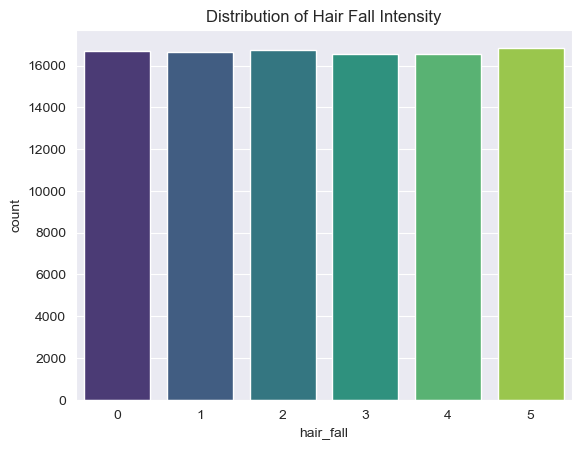

In [9]:
sns.countplot(x='hair_fall', data=data, palette='viridis')
plt.title('Distribution of Hair Fall Intensity')
plt.savefig('boxplots/distribution_hairfall.png')
plt.show()

In [10]:
data.describe()

,total_protein,total_keratine,hair_texture,vitamin,manganese,iron,calcium,body_water_content,stress_level,liver_data,hair_fall
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,249.573960,248.875470,49.558400,249.949730,249.558480,249.099260,250.538160,49.484590,49.366180,249.769930,2.501520
std,144.427199,144.193226,28.913959,144.240639,144.283595,144.341273,144.467648,28.863998,28.928164,144.639119,1.710604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,124.000000,25.000000,125.000000,125.000000,124.000000,125.000000,24.000000,24.000000,124.000000,1.000000
50%,250.000000,249.000000,50.000000,250.000000,250.000000,249.000000,251.000000,50.000000,49.000000,250.000000,2.000000
75%,375.000000,373.000000,75.000000,375.000000,375.000000,374.000000,376.000000,74.000000,75.000000,376.000000,4.000000
max,499.000000,499.000000,99.000000,499.000000,499.000000,499.000000,499.000000,99.000000,99.000000,499.000000,5.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   total_protein       100000 non-null  int64
 1   total_keratine      100000 non-null  int64
 2   hair_texture        100000 non-null  int64
 3   vitamin             100000 non-null  int64
 4   manganese           100000 non-null  int64
 5   iron                100000 non-null  int64
 6   calcium             100000 non-null  int64
 7   body_water_content  100000 non-null  int64
 8   stress_level        100000 non-null  int64
 9   liver_data          100000 non-null  int64
 10  hair_fall           100000 non-null  int64
dtypes: int64(11)
memory usage: 8.4 MB


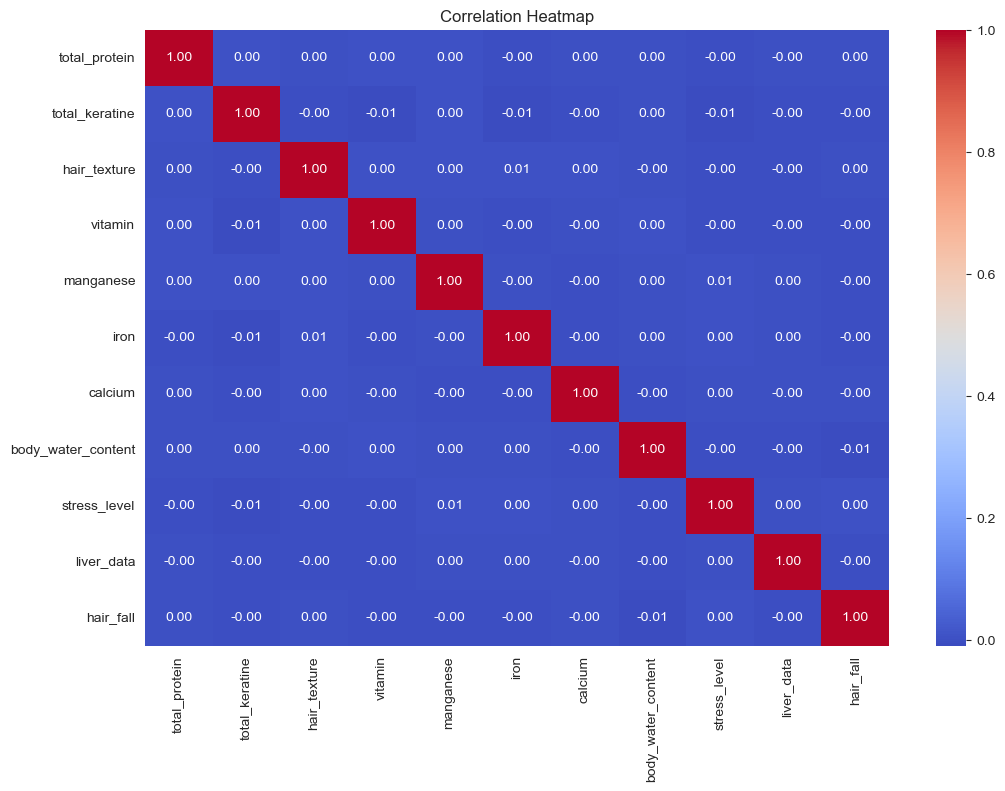

In [12]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('boxplots/corr_heat.png')
plt.show()